In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("university_enrollment_2306.csv")

data



,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [2]:
df=data.copy()

In [3]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [4]:
is_unique = df["course_id"].is_unique
is_unique

True

In [5]:
df.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [7]:
if df["year"].dtype == int:
    print(f"The year column is of the expected discrete data type.")
else:
    print(f"The year column is not of the expected discrete data type.")

# Check if all values are within the specified range
valid_range = all(2011 <= year <= 2022 for year in data["year"])
if valid_range:
    print(f"All values in the year column are within the range 2011 to 2022.")
else:
    print(f"Not all values in the year column are within the range 2011 to 2022.")

The year column is not of the expected discrete data type.
All values in the year column are within the range 2011 to 2022.


In [8]:
is_discrete = len(df["year"]) == len(df["year"].unique())
is_discrete

False

In [9]:
df["enrollment_count"].isnull().sum()

0

In [10]:
df["year"].duplicated().sum()

1838

In [11]:
df["enrollment_count"].duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1845     True
1846     True
1847     True
1848     True
1849     True
Name: enrollment_count, Length: 1850, dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [13]:
df["pre_score"].isnull().sum()

0

In [14]:
df["pre_score"]=pd.to_numeric(df["pre_score"], errors="coerce")

In [15]:
df["pre_score"].isnull().sum()

130

In [16]:
df['pre_score'].fillna(0, inplace=True)

In [17]:
df["pre_score"].isnull().sum()

0

In [18]:
df["post_score"].isnull().sum()

185

In [19]:
df['post_score'].fillna(0, inplace=True)

In [20]:
df["post_score"].isnull().sum()

0

In [21]:
df["pre_requirement"].isnull().sum()

89

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 115.8+ KB


In [23]:
df['pre_requirement'].fillna("None",inplace=True)

In [24]:
df['pre_requirement'].unique()

array(['Beginner', 'None', 'Intermediate'], dtype=object)

In [25]:
df["pre_requirement"].isnull().sum()

0

In [26]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [27]:
df["department"].isnull().sum()

0

In [28]:
df.isna().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

In [29]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

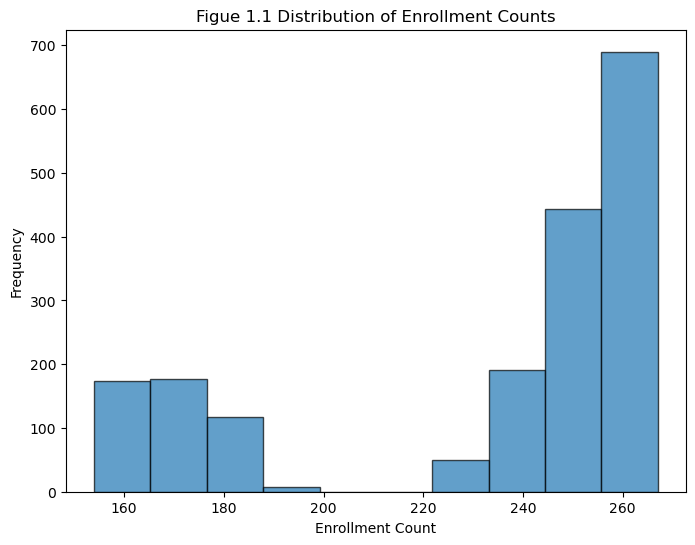

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(df['enrollment_count'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Figue 1.1 Distribution of Enrollment Counts')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.show()

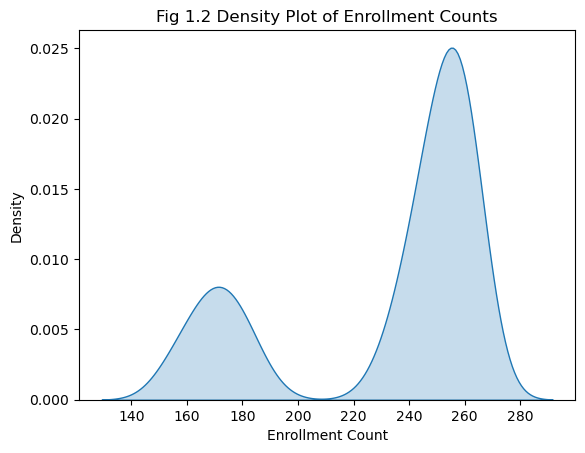

In [32]:
sns.kdeplot(data=df, x='enrollment_count', fill=True)
plt.title('Fig 1.2 Density Plot of Enrollment Counts')
plt.xlabel('Enrollment Count')
plt.ylabel('Density')
plt.show()

In [33]:
ctc = df['course_type'].value_counts()
ctc

online       1375
classroom     475
Name: course_type, dtype: int64

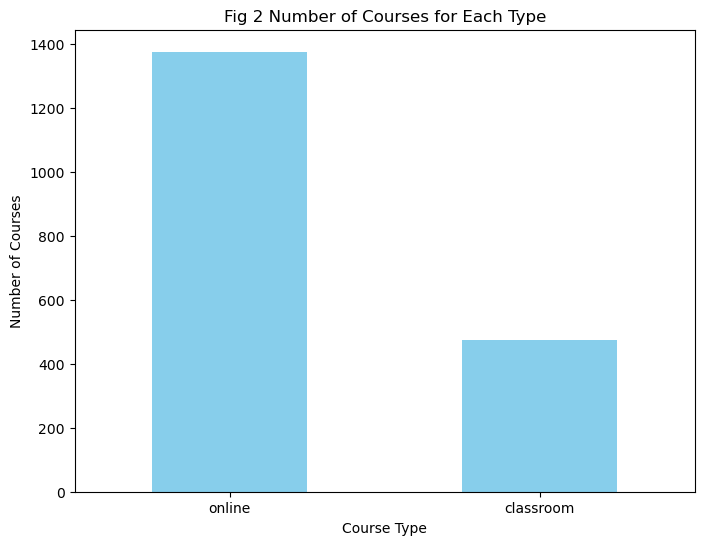

In [34]:
plt.figure(figsize=(8, 6))
ctc.plot(kind='bar', color='skyblue')
plt.title('Fig 2 Number of Courses for Each Type')
plt.xlabel('Course Type')
plt.ylabel('Number of Courses')
plt.xticks(rotation=0)
plt.show()

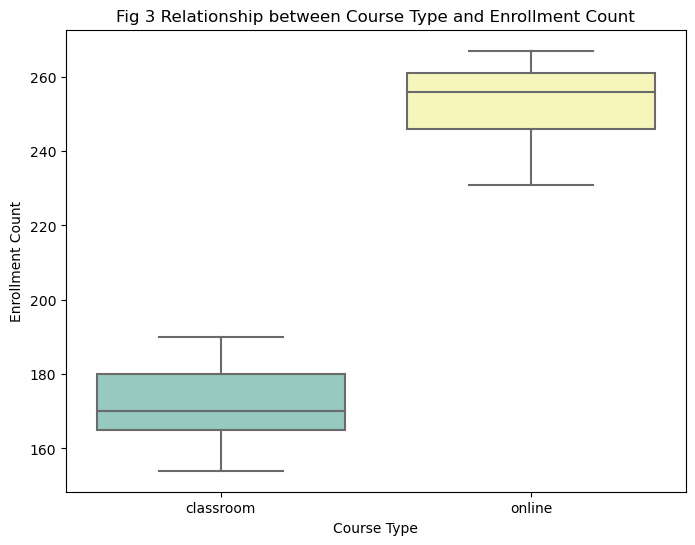

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='course_type', y='enrollment_count', data=df, palette='Set3')
plt.title('Fig 3 Relationship between Course Type and Enrollment Count')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.show()

In [36]:
#import ML models and peformance metrics
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [37]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [38]:
X= df.iloc[:,[1,2,4,5,6,7]]
y=df.iloc[:,[3]]
X


,course_type,year,pre_score,post_score,pre_requirement,department
0,classroom,2018,28.14,73.0,Beginner,Science
1,classroom,2020,79.68,86.0,None,Science
2,online,2016,57.24,80.0,None,Mathematics
3,online,2013,97.67,75.0,Beginner,Technology
4,classroom,2019,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...
1845,classroom,2018,60.01,81.0,Intermediate,Science
1846,online,2016,94.27,85.0,None,Technology
1847,online,2011,76.00,81.0,None,Mathematics
1848,online,2013,20.67,66.0,None,Math


In [39]:
y

,enrollment_count
0,165
1,175
2,257
3,251
4,165
...,...
1845,155
1846,261
1847,257
1848,256


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cte=['course_type','pre_requirement','department']
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),cte)],remainder='passthrough')
transformed_features=ct.fit_transform(X)

In [41]:
X=np.array(transformed_features)
X

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 2.018e+03, 2.814e+01,
        7.300e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.020e+03, 7.968e+01,
        8.600e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.016e+03, 5.724e+01,
        8.000e+01],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.011e+03, 7.600e+01,
        8.100e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.013e+03, 2.067e+01,
        6.600e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.017e+03, 1.757e+01,
        7.200e+01]])

In [42]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.4)

In [43]:
reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [44]:
y_pred = reg.predict(X_test)
y_pred.ndim

2

In [45]:
y_pred

array([[175.03795474],
       [256.09936755],
       [261.04304558],
       [155.01777834],
       [184.95614399],
       [251.09197748],
       [256.06570372],
       [236.11697306],
       [241.05442295],
       [251.06889802],
       [241.07366688],
       [261.07346715],
       [180.05354573],
       [180.03436186],
       [175.0092956 ],
       [261.03483885],
       [170.00377003],
       [170.03483087],
       [241.0923593 ],
       [261.05342193],
       [246.12507673],
       [256.1345704 ],
       [170.03583615],
       [261.01638918],
       [231.09977385],
       [251.0015853 ],
       [174.96074014],
       [250.97763398],
       [256.17186096],
       [250.9863753 ],
       [251.0520523 ],
       [185.00917305],
       [251.01861951],
       [180.06200803],
       [261.01000943],
       [251.08857275],
       [256.14917794],
       [251.00977277],
       [175.07080565],
       [261.01457927],
       [231.07134104],
       [261.00729245],
       [155.04091817],
       [251

In [46]:
y_pred=y_pred.reshape(-1)
y_pred

array([175.03795474, 256.09936755, 261.04304558, 155.01777834,
       184.95614399, 251.09197748, 256.06570372, 236.11697306,
       241.05442295, 251.06889802, 241.07366688, 261.07346715,
       180.05354573, 180.03436186, 175.0092956 , 261.03483885,
       170.00377003, 170.03483087, 241.0923593 , 261.05342193,
       246.12507673, 256.1345704 , 170.03583615, 261.01638918,
       231.09977385, 251.0015853 , 174.96074014, 250.97763398,
       256.17186096, 250.9863753 , 251.0520523 , 185.00917305,
       251.01861951, 180.06200803, 261.01000943, 251.08857275,
       256.14917794, 251.00977277, 175.07080565, 261.01457927,
       231.07134104, 261.00729245, 155.04091817, 251.0239757 ,
       260.99886843, 261.00329053, 260.97528813, 246.10631809,
       261.0166243 , 246.09886289, 256.08539327, 154.98477356,
       246.13151632, 236.1720268 , 165.00745406, 241.08535866,
       251.0623779 , 170.06893548, 261.02675265, 180.07164831,
       251.01601054, 180.08492829, 260.99622366, 261.01

In [47]:
y_pred.ndim

1

In [48]:
y_test.ndim

2

In [49]:
y_test

,enrollment_count
1077,175
513,256
123,261
951,155
813,185
...,...
1001,251
1378,261
1684,165
846,261


In [50]:
y_testarr=np.array(y_test)
y_testarr

array([[175],
       [256],
       [261],
       [155],
       [185],
       [252],
       [256],
       [236],
       [241],
       [251],
       [241],
       [261],
       [180],
       [180],
       [175],
       [261],
       [170],
       [170],
       [241],
       [261],
       [246],
       [257],
       [170],
       [261],
       [231],
       [251],
       [175],
       [251],
       [256],
       [251],
       [251],
       [185],
       [251],
       [181],
       [261],
       [251],
       [256],
       [251],
       [175],
       [261],
       [231],
       [261],
       [155],
       [251],
       [261],
       [261],
       [261],
       [247],
       [261],
       [246],
       [256],
       [155],
       [246],
       [236],
       [165],
       [241],
       [251],
       [171],
       [261],
       [180],
       [251],
       [181],
       [261],
       [261],
       [261],
       [261],
       [257],
       [236],
       [165],
       [231],
       [251],
      

In [51]:
y_testarr.ndim

2

In [52]:
y_testarr=y_testarr.reshape(-1)
y_testarr

array([175, 256, 261, 155, 185, 252, 256, 236, 241, 251, 241, 261, 180,
       180, 175, 261, 170, 170, 241, 261, 246, 257, 170, 261, 231, 251,
       175, 251, 256, 251, 251, 185, 251, 181, 261, 251, 256, 251, 175,
       261, 231, 261, 155, 251, 261, 261, 261, 247, 261, 246, 256, 155,
       246, 236, 165, 241, 251, 171, 261, 180, 251, 181, 261, 261, 261,
       261, 257, 236, 165, 231, 251, 261, 251, 246, 241, 251, 170, 170,
       251, 257, 247, 175, 261, 241, 246, 256, 175, 251, 175, 182, 256,
       261, 256, 261, 261, 261, 256, 170, 185, 241, 256, 251, 256, 251,
       261, 251, 251, 180, 256, 261, 155, 155, 165, 170, 231, 180, 246,
       251, 255, 261, 261, 256, 155, 256, 256, 251, 251, 251, 256, 170,
       241, 261, 170, 245, 257, 266, 257, 241, 251, 170, 256, 261, 251,
       261, 156, 238, 171, 261, 261, 241, 165, 258, 180, 261, 175, 246,
       251, 261, 231, 252, 261, 175, 261, 247, 257, 180, 252, 261, 241,
       251, 180, 155, 165, 246, 165, 257, 180, 241, 257, 251, 23

In [53]:
df_y =pd.DataFrame({'Real Values': y_testarr,'Predicted Values':y_pred})
df_y

,Real Values,Predicted Values
0,175,175.037955
1,256,256.099368
2,261,261.043046
3,155,155.017778
4,185,184.956144
...,...,...
735,251,250.956182
736,261,261.034146
737,165,164.981030
738,261,261.042359


In [54]:
y_train.ndim

2

In [55]:
y_train=np.array(y_train).reshape(-1)


In [56]:
rf = RandomForestRegressor()
rf = rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [57]:
y_pred_rf

array([175.11, 256.59, 261.  , 155.  , 185.  , 251.27, 255.68, 235.53,
       241.01, 251.08, 241.27, 261.  , 180.81, 180.23, 175.  , 261.  ,
       170.56, 170.02, 241.  , 261.  , 246.36, 256.46, 170.  , 261.  ,
       231.61, 251.  , 175.  , 251.  , 255.86, 251.  , 251.04, 185.  ,
       251.  , 180.28, 261.  , 251.06, 256.22, 251.  , 175.04, 261.  ,
       231.35, 261.  , 155.06, 251.  , 261.  , 261.  , 261.  , 246.  ,
       261.  , 246.  , 256.77, 155.  , 246.01, 236.21, 165.  , 241.03,
       251.  , 169.9 , 261.  , 180.8 , 251.  , 180.1 , 261.  , 261.  ,
       261.  , 261.  , 256.27, 236.21, 165.  , 231.09, 251.  , 261.  ,
       251.  , 246.07, 241.  , 251.  , 170.  , 170.  , 251.26, 256.46,
       246.12, 175.08, 261.  , 240.97, 246.  , 256.5 , 175.18, 251.  ,
       175.  , 180.84, 256.04, 261.  , 256.  , 261.  , 261.  , 261.  ,
       256.44, 169.83, 185.  , 240.66, 256.3 , 251.48, 255.88, 250.95,
       261.  , 251.  , 251.  , 180.  , 256.02, 261.  , 155.  , 154.91,
      

In [58]:
df_rfy =pd.DataFrame({'Real Values': y_testarr,'Predicted Values':y_pred_rf})
df_rfy

,Real Values,Predicted Values
0,175,175.11
1,256,256.59
2,261,261.00
3,155,155.00
4,185,185.00
...,...,...
735,251,251.00
736,261,261.00
737,165,165.00
738,261,261.00


In [59]:
mse_l = mean_squared_error(np.exp(y_testarr), np.exp(y_pred))
print(np.sqrt(mse_l))

mse_r = mean_squared_error(np.exp(y_testarr), np.exp(y_pred_rf))
print(np.sqrt(mse_r))

2.0495345645602042e+114
2.1531297272146647e+114
